In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
dataset = load_boston()
df = pd.DataFrame(dataset.data,columns = dataset.feature_names)
df['TARGET'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df.drop('TARGET',axis=1)
Y = df['TARGET']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
x_train.shape , x_test.shape

((404, 13), (102, 13))

<AxesSubplot:>

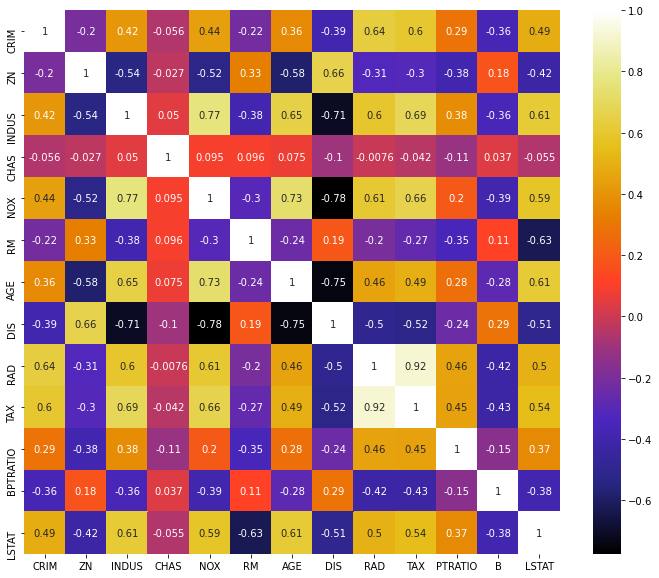

In [5]:
plt.figure(figsize=(12,10))
correlation = x_train.corr()
sns.heatmap(correlation,annot=True,cmap=plt.cm.CMRmap)

In [6]:
def find_correlated_features(data,threshold):
    col_corr = set()
    corr_metrix = data.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if((corr_metrix.iloc[i,j])>threshold):
                column_name = corr_metrix.columns[i]
                col_corr.add(column_name)
    return col_corr

In [7]:
# do not this step with x_test data in order to avoid any type of over fitting , just delete these columns from x_test afterwards
corelated_features = find_correlated_features(x_train,0.7)
corelated_features

{'AGE', 'NOX', 'TAX'}

In [13]:
x_train = x_train.drop(corelated_features,axis=1)
x_train.head()

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
434,13.91340,0.0,18.10,0.0,6.208,2.2222,24.0,20.2,100.63,15.17
504,0.10959,0.0,11.93,0.0,6.794,2.3889,1.0,21.0,393.45,6.48
18,0.80271,0.0,8.14,0.0,5.456,3.7965,4.0,21.0,288.99,11.69
26,0.67191,0.0,8.14,0.0,5.813,4.6820,4.0,21.0,376.88,14.81
111,0.10084,0.0,10.01,0.0,6.715,2.6775,6.0,17.8,395.59,10.16


In [14]:
x_train.shape

(404, 10)